In [ ]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:

traindata = pd.read_csv(r"C:\Users\Hp\Desktop\ICT\data set\train_ctrUa4K.csv")

In [ ]:
traindata.head()

In [ ]:
testdata = pd.read_csv(r"C:\Users\Hp\Desktop\ICT\data set\test_lAUu6dG.csv")

In [ ]:
testdata.head()

In [ ]:
traindata.info()

In [ ]:
train_original=traindata.copy()
test_original=testdata.copy()

In [ ]:
testdata.info()

In [ ]:
traindata.shape

In [ ]:
testdata.shape

In [ ]:
traindata.describe()

In [ ]:
testdata.describe()

In [ ]:
traindata['Loan_Status'].value_counts()

In [ ]:
traindata['Loan_Status'].value_counts()

In [ ]:
traindata['Loan_Status'].value_counts().plot.bar()

In [ ]:
plt.figure(1)
plt.subplot(221)
traindata['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222)
traindata['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(223)
traindata['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(224)
traindata['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.show()

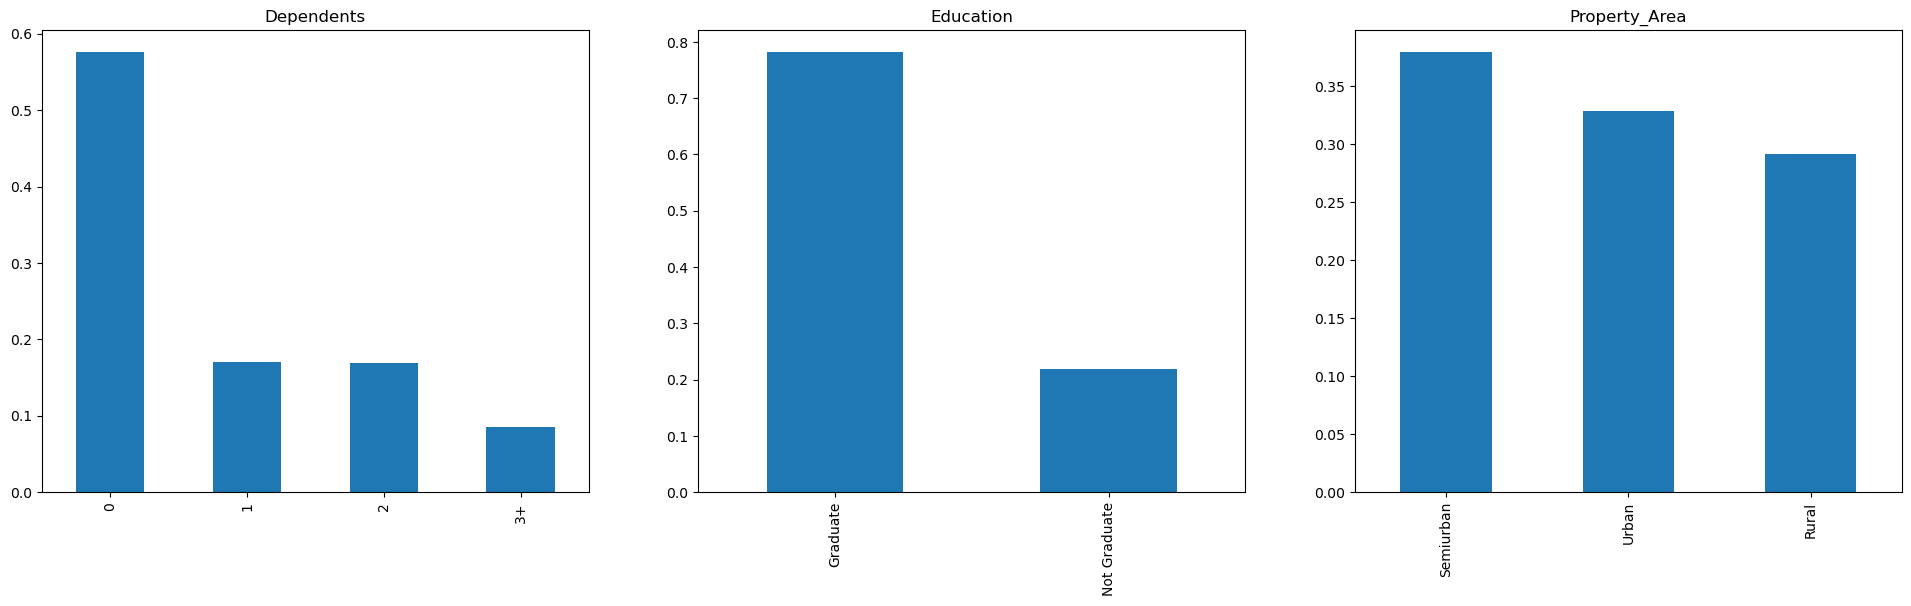

In [17]:
plt.figure(1)
plt.subplot(131)
traindata['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')

plt.subplot(132)
traindata['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(133)
traindata['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

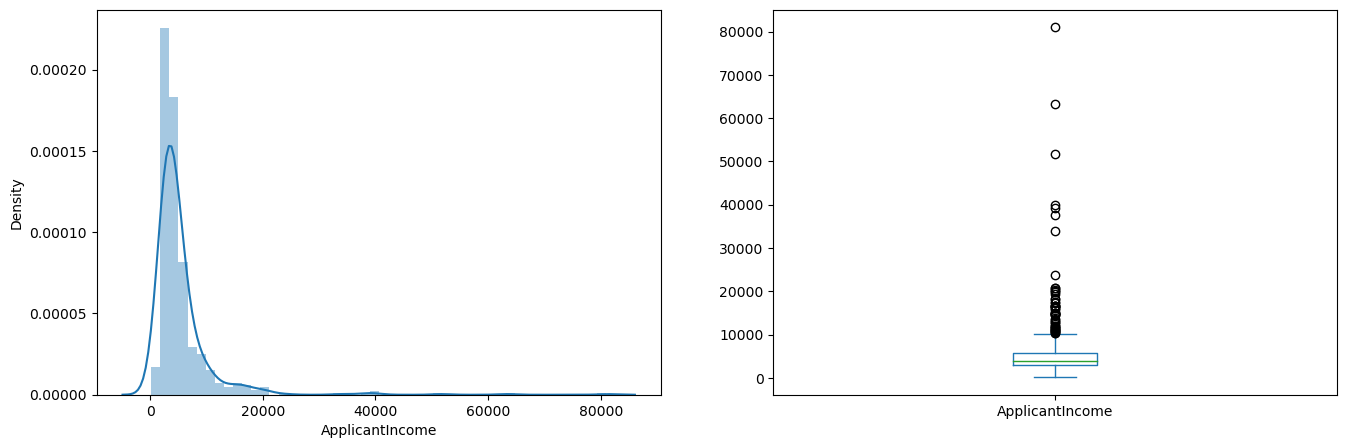

In [18]:
plt.figure(1)
plt.subplot(121)
sns.distplot(traindata['ApplicantIncome']);

plt.subplot(122)
traindata['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

Text(0.5, 0.98, '')

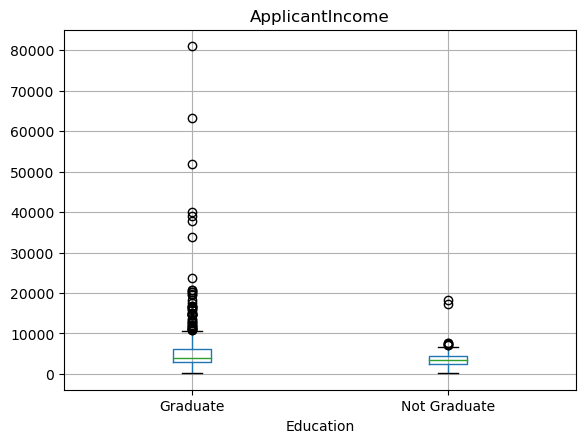

In [19]:
traindata.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

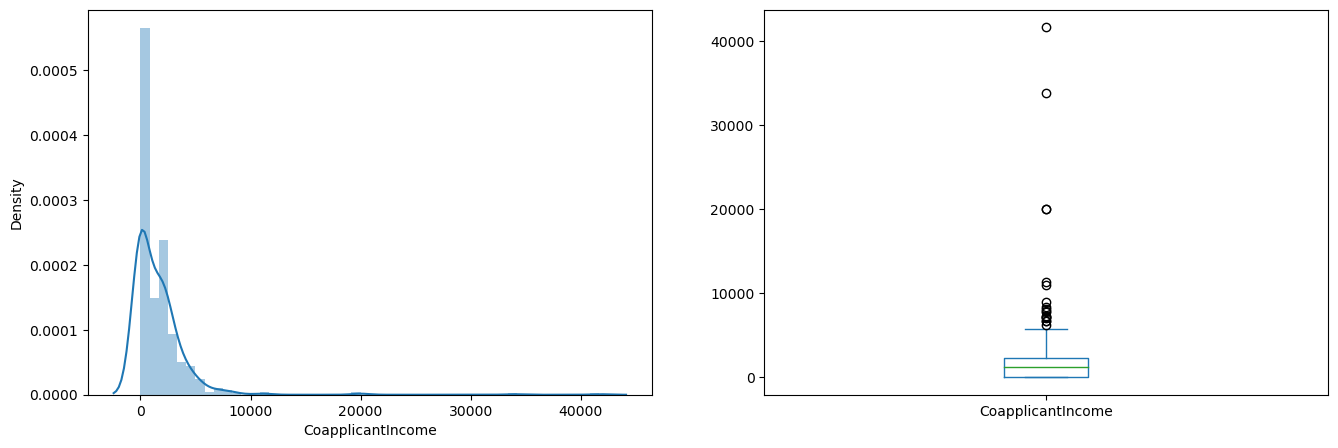

In [20]:

plt.figure(1)
plt.subplot(121)
sns.distplot(traindata['CoapplicantIncome']);

plt.subplot(122)
traindata['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

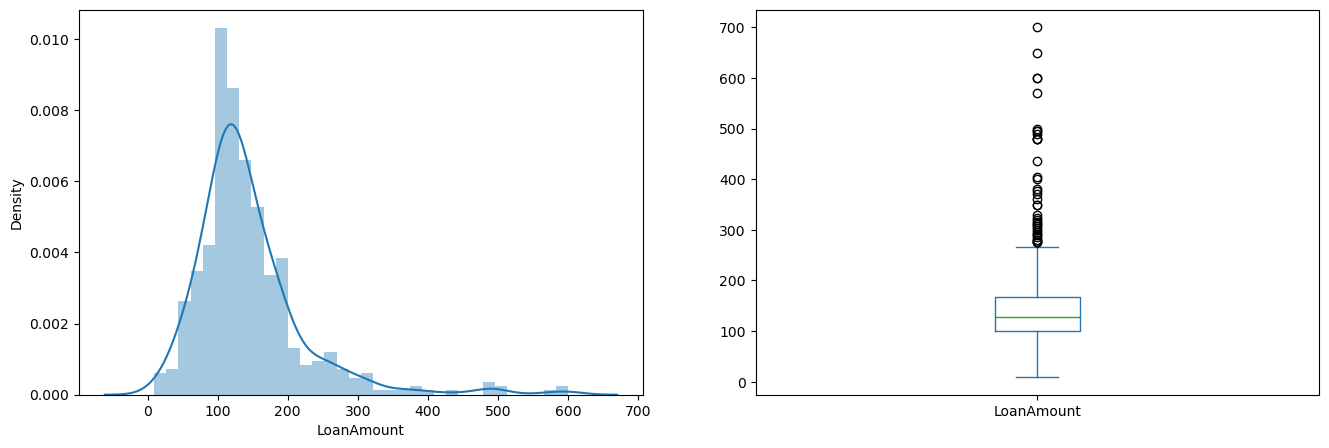

In [21]:
plt.figure(1)
plt.subplot(121)
df=traindata.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
traindata['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

<AxesSubplot:xlabel='Gender'>

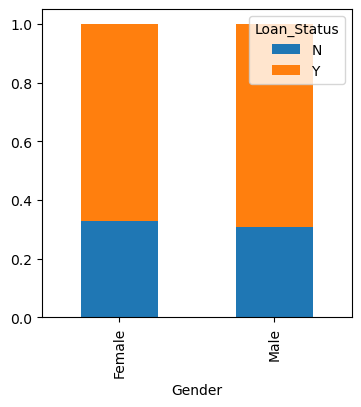

In [22]:
Gender=pd.crosstab(traindata['Gender'],traindata['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

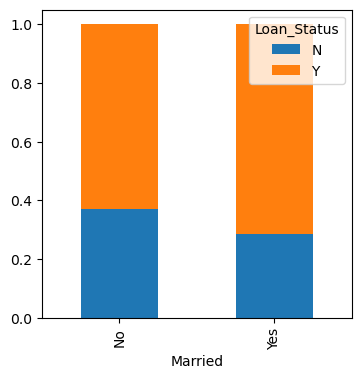

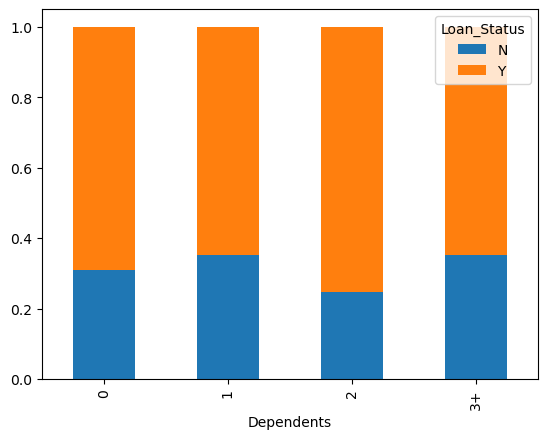

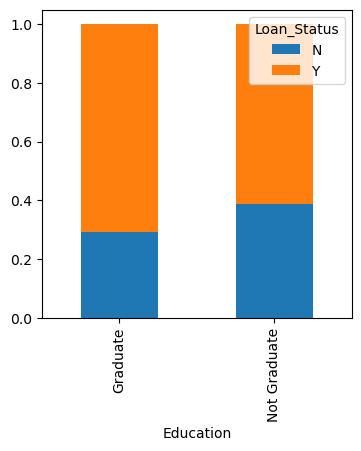

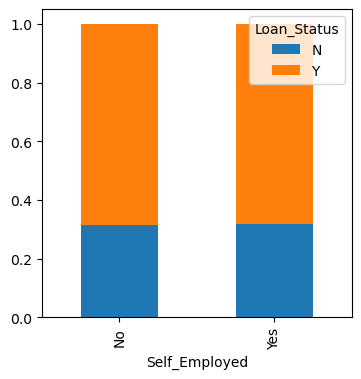

In [23]:
Married=pd.crosstab(traindata['Married'],traindata['Loan_Status'])
Dependents=pd.crosstab(traindata['Dependents'],traindata['Loan_Status'])
Education=pd.crosstab(traindata['Education'],traindata['Loan_Status'])
Self_Employed=pd.crosstab(traindata['Self_Employed'],traindata['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()


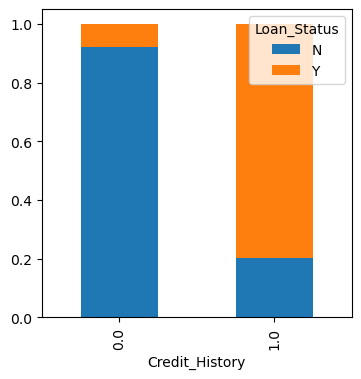

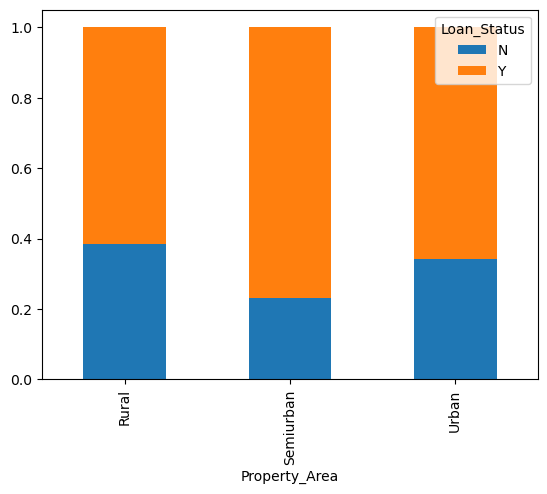

In [24]:
Credit_History=pd.crosstab(traindata['Credit_History'],traindata['Loan_Status'])
Property_Area=pd.crosstab(traindata['Property_Area'],traindata['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()


<AxesSubplot:xlabel='Loan_Status'>

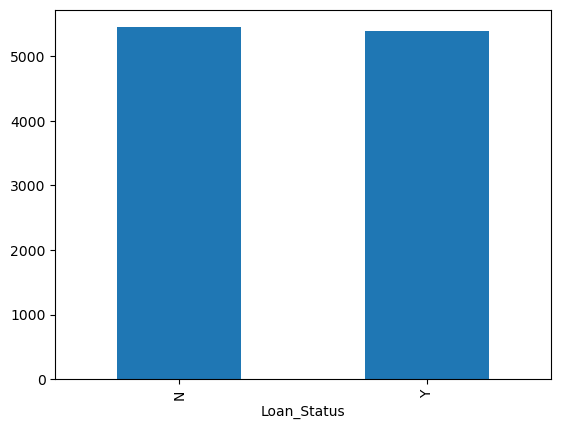

In [25]:

traindata.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [26]:

bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
traindata['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

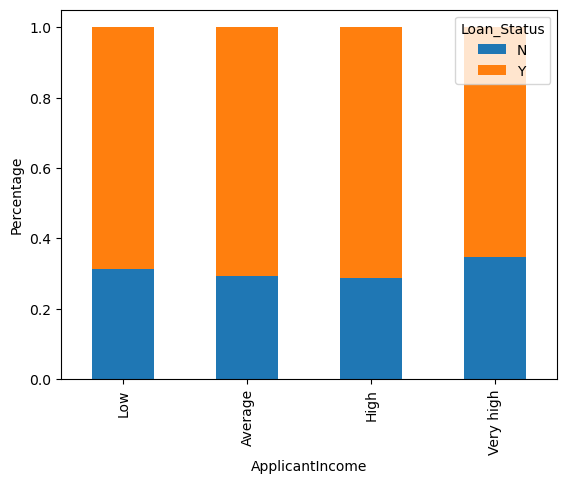

In [27]:
Income_bin=pd.crosstab(traindata['Income_bin'],traindata['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

In [28]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
traindata['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)

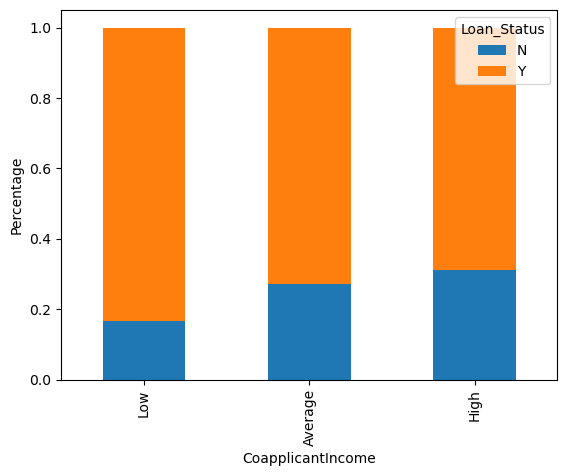

In [29]:

Coapplicant_Income_bin=pd.crosstab(traindata['Coapplicant_Income_bin'],traindata['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

In [30]:
traindata['Total_Income']=traindata['ApplicantIncome']+traindata['CoapplicantIncome']

In [31]:

bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
traindata['Total_Income_bin']=pd.cut(traindata['Total_Income'],bins,labels=group)

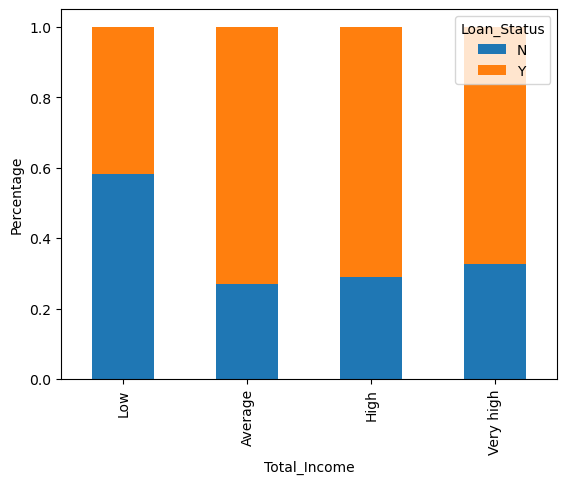

In [32]:
Total_Income_bin=pd.crosstab(traindata['Total_Income_bin'],traindata['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

In [33]:

bins=[0,100,200,700]
group=['Low','Average','High']
traindata['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)

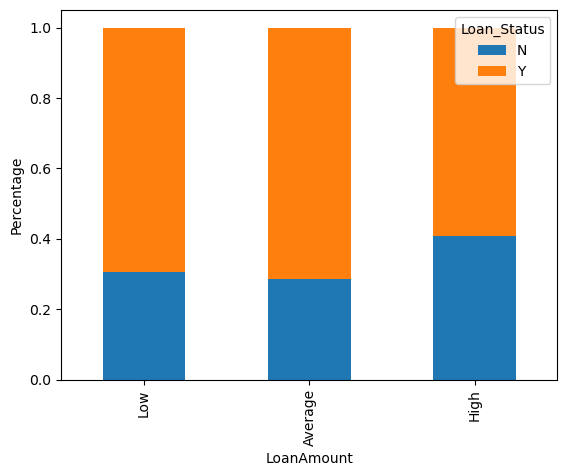

In [34]:

LoanAmount_bin=pd.crosstab(traindata['LoanAmount_bin'],traindata['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

In [35]:

traindata=traindata.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [36]:
traindata['Dependents'].replace('3+', 3,inplace=True)
testdata['Dependents'].replace('3+', 3,inplace=True)
traindata['Loan_Status'].replace('N', 0,inplace=True)
traindata['Loan_Status'].replace('Y', 1,inplace=True)

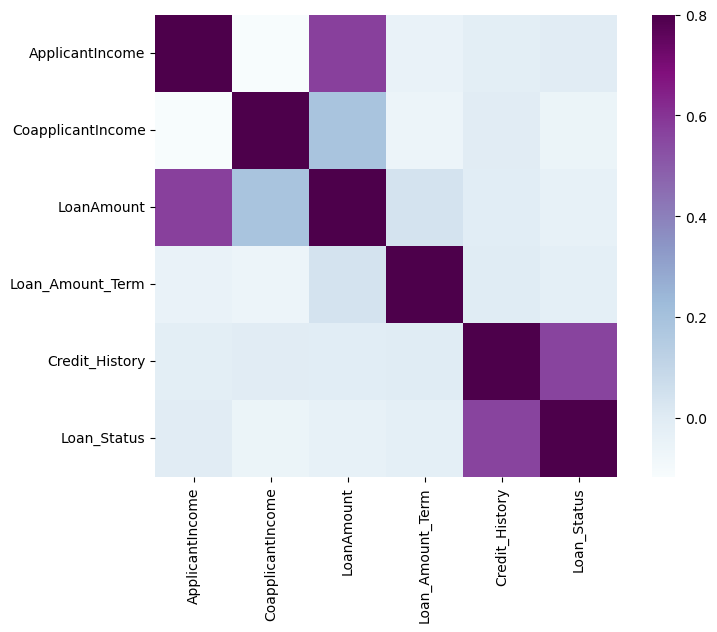

In [37]:
matrix = traindata.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [38]:
# Missing Value and Outlier Treatment

In [40]:

traindata.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
traindata['Gender'].fillna(traindata['Gender'].mode()[0], inplace=True)
traindata['Married'].fillna(traindata['Married'].mode()[0], inplace=True)
traindata['Dependents'].fillna(traindata['Dependents'].mode()[0], inplace=True)
traindata['Self_Employed'].fillna(traindata['Self_Employed'].mode()[0], inplace=True)
traindata['LoanAmount'].fillna(traindata['LoanAmount'].mode()[0], inplace=True)
traindata['Loan_Amount_Term'].fillna(traindata['Loan_Amount_Term'].mode()[0], inplace=True)
traindata['Credit_History'].fillna(traindata['Credit_History'].mode()[0], inplace=True)

In [42]:
traindata['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [43]:
traindata['LoanAmount'].fillna(traindata['LoanAmount'].median(), inplace=True)

In [44]:
traindata['Loan_Amount_Term'].fillna(traindata['Loan_Amount_Term'].mode()[0], inplace=True)

In [45]:
traindata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [46]:
testdata['Gender'].fillna(traindata['Gender'].mode()[0], inplace=True)
testdata['Married'].fillna(traindata['Married'].mode()[0], inplace=True)
testdata['Dependents'].fillna(traindata['Dependents'].mode()[0], inplace=True)
testdata['Self_Employed'].fillna(traindata['Self_Employed'].mode()[0], inplace=True)
testdata['Credit_History'].fillna(traindata['Credit_History'].mode()[0], inplace=True)
testdata['Loan_Amount_Term'].fillna(traindata['Loan_Amount_Term'].mode()[0], inplace=True)
testdata['LoanAmount'].fillna(traindata['LoanAmount'].median(), inplace=True)

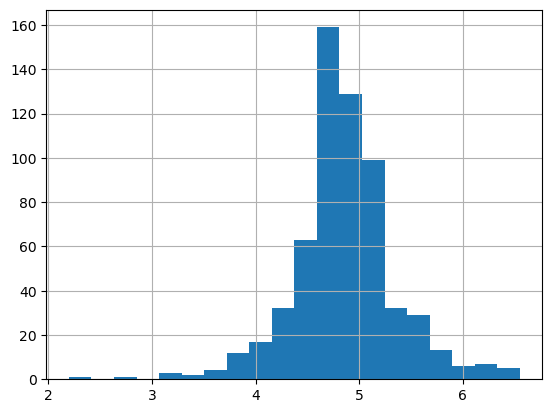

In [47]:
traindata['LoanAmount_log'] = np.log(traindata['LoanAmount'])
traindata['LoanAmount_log'].hist(bins=20)
testdata['LoanAmount_log'] = np.log(testdata['LoanAmount'])

In [48]:
traindata=traindata.drop('Loan_ID',axis=1)
testdata=testdata.drop('Loan_ID',axis=1)

In [49]:
X = traindata.drop('Loan_Status',1)
y = traindata.Loan_Status

In [50]:
X=pd.get_dummies(X)
traindata=pd.get_dummies(traindata)
testdata=pd.get_dummies(testdata)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [54]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [55]:
pred_cv = model.predict(x_cv)

In [56]:
accuracy_score(y_cv,pred_cv)

0.8108108108108109

In [57]:
pred_testdata = model.predict(testdata)

In [58]:
sub=pd.read_csv(r"C:\Users\Hp\Desktop\ICT\data set\sample_submission_49d68Cx.csv")

In [59]:
sub['Loan_Status']=pred_testdata
sub['Loan_ID']=test_original['Loan_ID']

In [60]:
sub['Loan_Status'].replace(0, 'N',inplace=True)
sub['Loan_Status'].replace(1, 'Y',inplace=True)

In [61]:
pd.DataFrame(sub, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

### Logistic Regression using stratified k-folds cross validation

In [62]:
from sklearn.model_selection import StratifiedKFold

In [80]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for traindata_index,testdata_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[traindata_index],X.loc[testdata_index]
     ytr,yvl = y[traindata_index],y[testdata_index]
    
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_testdata = model.predict(xvl)
     score = accuracy_score(yvl,pred_testdata)
     print('accuracy_score',score)
     i+=1
pred_testdata = model.predict(testdata)
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7642276422764228

2 of kfold 5
accuracy_score 0.7235772357723578

3 of kfold 5
accuracy_score 0.6666666666666666

4 of kfold 5
accuracy_score 0.7642276422764228

5 of kfold 5
accuracy_score 0.7377049180327869


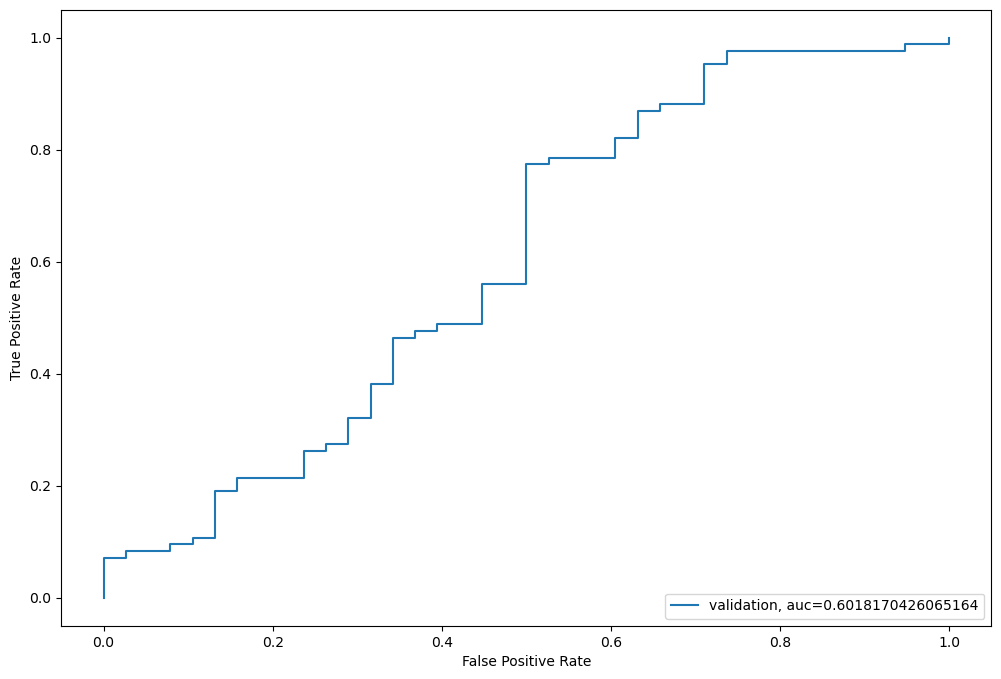

In [81]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [82]:
sub['Loan_Status']=pred_testdata
sub['Loan_ID']=test_original['Loan_ID']

In [83]:
sub['Loan_Status'].replace(0, 'N',inplace=True)
sub['Loan_Status'].replace(1, 'Y',inplace=True)

In [84]:
pd.DataFrame(sub, columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv')

### Feature Engineering


In [85]:
traindata['Total_Income']=traindata['ApplicantIncome']+traindata['CoapplicantIncome']
testdata['Total_Income']=testdata['ApplicantIncome']+testdata['CoapplicantIncome']

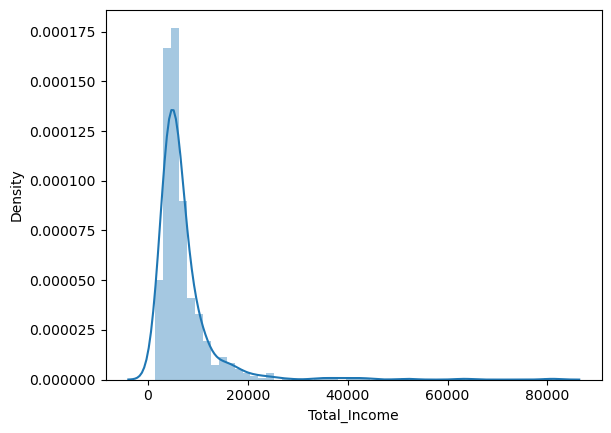

In [86]:
sns.distplot(traindata['Total_Income']);

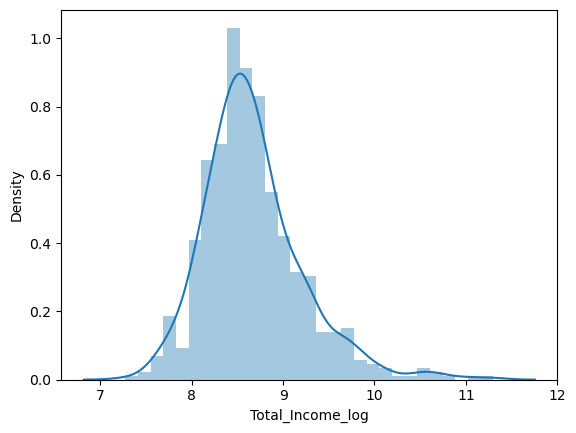

In [87]:
traindata['Total_Income_log'] = np.log(traindata['Total_Income'])
sns.distplot(traindata['Total_Income_log']);
testdata['Total_Income_log'] = np.log(testdata['Total_Income'])

In [88]:
traindata['EMI']=traindata['LoanAmount']/traindata['Loan_Amount_Term']
testdata['EMI']=testdata['LoanAmount']/testdata['Loan_Amount_Term']

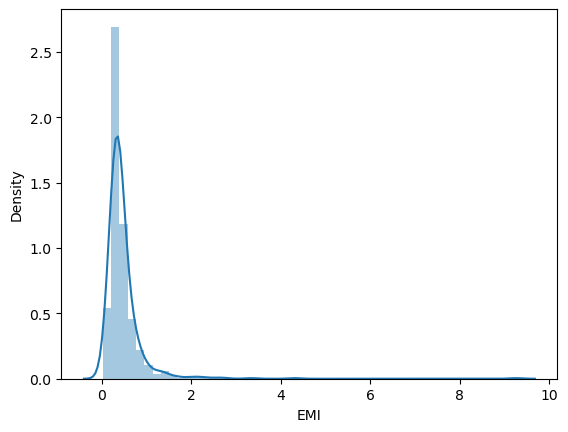

In [89]:

sns.distplot(traindata['EMI']);

In [90]:
traindata['Balance Income']=traindata['Total_Income']-(traindata['EMI']*1000) # Multiply with 1000 to make the units equal 
testdata['Balance Income']=testdata['Total_Income']-(testdata['EMI']*1000)

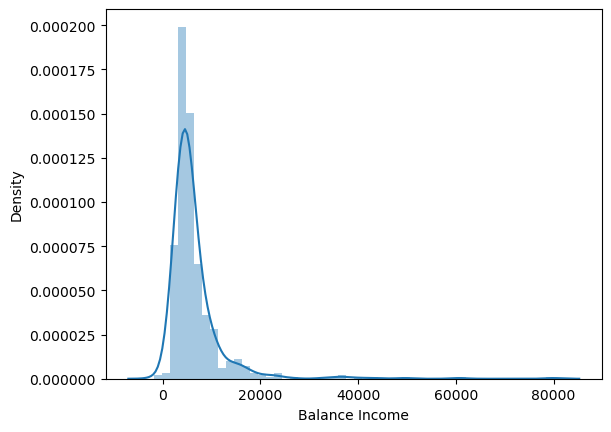

In [91]:
sns.distplot(traindata['Balance Income']);

In [92]:
train=traindata.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test=testdata.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)


### Model Building 

In [93]:
X = traindata.drop('Loan_Status',1)
y = traindata.Loan_Status     

In [95]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,testdata_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[traindata_index],X.loc[test_index]
     ytr,yvl = y[traindata_index],y[test_index]
    
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_testdata = model.predict(testdata)
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7377049180327869

2 of kfold 5
accuracy_score 0.7377049180327869

3 of kfold 5
accuracy_score 0.7377049180327869

4 of kfold 5
accuracy_score 0.7377049180327869

5 of kfold 5
accuracy_score 0.7377049180327869


In [96]:
sub['Loan_Status']=pred_testdata            # filling Loan_Status with predictions
sub['Loan_ID']=test_original['Loan_ID']

In [97]:
# replacing 0 and 1 with N and Y
sub['Loan_Status'].replace(0, 'N',inplace=True)
sub['Loan_Status'].replace(1, 'Y',inplace=True)

In [140]:
# Converting submission file to .csv format
pd.DataFrame(sub, columns=['Loan_ID','Loan_Status']).to_csv('Log2.csv', index=False)

In [141]:
# Decision Tree 

In [142]:
from sklearn import tree

In [143]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for traindata_index,testdata_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[traindata_index],X.loc[testdata_index]
     ytr,yvl = y[traindata_index],y[testdata_index]
    
     model = tree.DecisionTreeClassifier(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(testdata)


1 of kfold 5
accuracy_score 0.7235772357723578

2 of kfold 5
accuracy_score 0.7479674796747967

3 of kfold 5
accuracy_score 0.6585365853658537

4 of kfold 5
accuracy_score 0.6910569105691057

5 of kfold 5
accuracy_score 0.7049180327868853


In [144]:
sub['Loan_Status']=pred_test            # filling Loan_Status with predictions
sub['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID

In [145]:

# replacing 0 and 1 with N and Y
sub['Loan_Status'].replace(0, 'N',inplace=True)
sub['Loan_Status'].replace(1, 'Y',inplace=True)

In [148]:
pd.DataFrame(sub, columns=['Loan_ID','Loan_Status']).to_csv('Decision Tree.csv', index=False)


In [147]:
# Random Forest

In [112]:

from sklearn.ensemble import RandomForestClassifier

In [115]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = RandomForestClassifier(random_state=1, max_depth=10)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(testdata)


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8455284552845529

3 of kfold 5
accuracy_score 0.8211382113821138

4 of kfold 5
accuracy_score 0.7723577235772358

5 of kfold 5
accuracy_score 0.7704918032786885


In [116]:

from sklearn.model_selection import GridSearchCV

In [117]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [118]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [119]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

In [120]:
# Fit the grid search model
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [122]:

# Estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(max_depth=3, n_estimators=41, random_state=1)

In [129]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for traindata_index,testdata_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[traindata_index],X.loc[testdata_index]
     ytr,yvl = y[traindata_index],y[testdata_index]
    
     model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(testdata)
pred2=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.8211382113821138

2 of kfold 5
accuracy_score 0.8292682926829268

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7950819672131147


ValueError: X has 21 features, but RandomForestClassifier is expecting 25 features as input.

In [136]:
sub['Loan_Status']=pred_test            # filling Loan_Status with predictions
sub['Loan_ID']=test_original['Loan_ID'] 

In [132]:

# replacing 0 and 1 with N and Y
sub['Loan_Status'].replace(0, 'N',inplace=True)
sub['Loan_Status'].replace(1, 'Y',inplace=True)

In [139]:
# Converting submission file to .csv format
pd.DataFrame(sub, columns=['Loan_ID','Loan_Status']).to_csv('Random Forest.csv', index=False)

<AxesSubplot:>

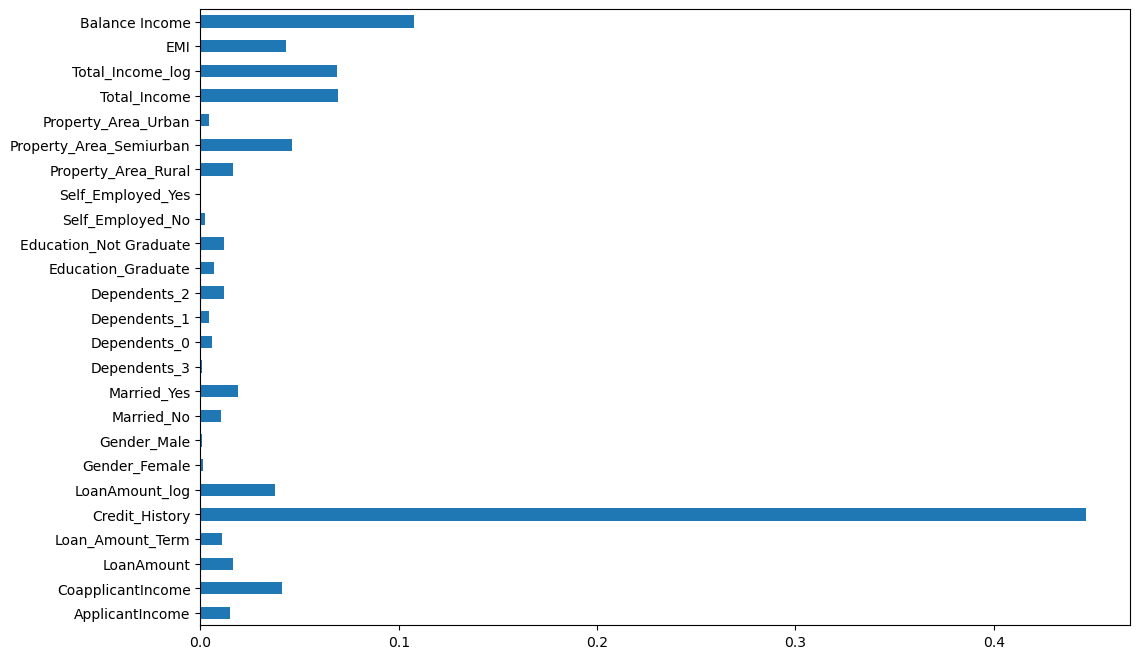

In [134]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))